# Домашнее задание «Функции и работа с данными»
## Преподаватель: Константин Башевой

### Задание 1
Напишите функцию, которая классифицирует фильмы из материалов занятия по следующим правилам:
- оценка 2 и меньше - низкий рейтинг
- оценка 4 и меньше - средний рейтинг
- оценка 4.5 и 5 - высокий рейтинг

Результат классификации запишите в столбец class

In [1]:
import pandas as pd

In [2]:
ratings = pd.read_csv('ratings.dat', sep = '::', engine='python', names = ['userId', 'movieId', 'rating', 'timestamp'])
ratings.head()

,userId,movieId,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [3]:
movies = pd.read_csv('movies.dat', sep = '::', engine='python', names = ['movieId', 'movieName', 'moveType'])
movies.head()

,movieId,movieName,moveType
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
joined = ratings.merge(movies, on='movieId', how='left')
joined.head()

,userId,movieId,rating,timestamp,movieName,moveType
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama
1,1,661,3,978302109,James and the Giant Peach (1996),Animation|Children's|Musical
2,1,914,3,978301968,My Fair Lady (1964),Musical|Romance
3,1,3408,4,978300275,Erin Brockovich (2000),Drama
4,1,2355,5,978824291,"Bug's Life, A (1998)",Animation|Children's|Comedy


In [5]:
obj = joined[['movieName', 'rating']].groupby('movieName').mean()

In [6]:
def rating_class(row):
    """
    оценка 2 и меньше - низкий рейтинг
    оценка 4 и меньше - средний рейтинг
    оценка 4.5 и 5 - высокий рейтинг
    """
    if row['rating'] <= 2:
        class_ = 'низкий рейтинг'
    elif 2 < row['rating'] <= 4.5:
        class_ = 'срейдний рейтинг'
    elif row['rating'] > 4.5:
        class_ = 'высокий рейтинг'
    return class_

In [7]:
obj['class'] = obj.apply(rating_class, axis=1)
obj.head()

,rating,class
movieName,,
"$1,000,000 Duck (1971)",3.027027,срейдний рейтинг
'Night Mother (1986),3.371429,срейдний рейтинг
'Til There Was You (1997),2.692308,срейдний рейтинг
"'burbs, The (1989)",2.910891,срейдний рейтинг
...And Justice for All (1979),3.713568,срейдний рейтинг


In [8]:
obj.sort_values('rating', ascending=False).head()

,rating,class
movieName,,
Ulysses (Ulisse) (1954),5.0,высокий рейтинг
Lured (1947),5.0,высокий рейтинг
Follow the Bitch (1998),5.0,высокий рейтинг
Bittersweet Motel (2000),5.0,высокий рейтинг
Song of Freedom (1936),5.0,высокий рейтинг


In [9]:
obj.sort_values('rating', ascending=True).head()

,rating,class
movieName,,
Elstree Calling (1930),1.0,низкий рейтинг
Get Over It (1996),1.0,низкий рейтинг
Venice/Venice (1992),1.0,низкий рейтинг
Windows (1980),1.0,низкий рейтинг
Kestrel's Eye (Falkens цga) (1998),1.0,низкий рейтинг


<hr>

### Задание 2
Используем файл keywords.csv.

Необходимо написать гео-классификатор, который каждой строке сможет выставить географическую принадлежность определенному региону. Т. е. если поисковый запрос содержит название города региона, то в столбце ‘region’ пишется название этого региона. Если поисковый запрос не содержит названия города, то ставим ‘undefined’.

Правила распределения по регионам Центр, Северо-Запад и Дальний Восток:

geo_data = {

'Центр': ['москва', 'тула', 'ярославль'],

'Северо-Запад': ['петербург', 'псков', 'мурманск'],

'Дальний Восток': ['владивосток', 'сахалин', 'хабаровск']
}

Результат классификации запишите в отдельный столбец region.

In [10]:
kw = pd.read_csv('keywords.csv')
kw.head()

,keyword,shows
0,вк,64292779
1,одноклассники,63810309
2,порно,41747114
3,ютуб,39995567
4,вконтакте,21014195


In [11]:
geo_data = {

'Центр': ['москва', 'тула', 'ярославль'],

'Северо-Запад': ['петербург', 'псков', 'мурманск'],

'Дальний Восток': ['владивосток', 'сахалин', 'хабаровск'] }

In [12]:
for region_ in geo_data:
    for cities in geo_data.values():
        for city in cities:
            if city in geo_data[region_]:
                print(region_, city)

Центр москва
Центр тула
Центр ярославль
Северо-Запад петербург
Северо-Запад псков
Северо-Запад мурманск
Дальний Восток владивосток
Дальний Восток сахалин
Дальний Восток хабаровск


In [13]:
def geo_classificator(row):
    for region_ in geo_data:
        for cities in geo_data.values():
            for city in cities:
                if city in geo_data[region_]:
                    if city in row['keyword']:
                        return region_
                    else:
                        reg = 'undefined'
                        
    return reg

In [15]:
kw['region'] = kw.apply(geo_classificator, axis=1)
kw.sort_values('region', ascending=False).head()

,keyword,shows,region
6999,москва 24,37459,Центр
61986,такси везет москва официальный сайт,6063,Центр
43404,суперджоб москва вакансии,8208,Центр
73226,фанатик спартак москва,5353,Центр
68005,гостиница москва,5651,Центр


In [16]:
kw.groupby('region').sum().head()

,shows
region,
undefined,2583866372
Дальний Восток,1490111
Северо-Запад,4509552
Центр,7563484


### Задание 3 (бонусное)
Есть мнение, что “раньше снимали настоящее кино, не то что сейчас”. Ваша задача проверить это утверждение, используя файлы с рейтингами фильмов из прошлого домашнего занятия (файл ratings.csv из базы https://grouplens.org/datasets/movielens). Т. е. проверить верно ли, что с ростом года выпуска фильма его средний рейтинг становится ниже.

При этом мы не будем затрагивать субьективные факторы выставления этих рейтингов, а пройдемся по следующему алгоритму:

В переменную years запишите список из всех годов с 1950 по 2010.

Напишите функцию production_year, которая каждой строке из названия фильма выставляет год выпуска. Не все названия фильмов содержат год выпуска в одинаковом формате, поэтому используйте следующий алгоритм:

для каждой строки пройдите по всем годам списка years
если номер года присутствует в названии фильма, то функция возвращает этот год как год выпуска
если ни один из номеров года списка years не встретился в названии фильма, то возвращается 1900 год
Запишите год выпуска фильма по алгоритму пункта 2 в новый столбец ‘year’

Посчитайте средний рейтинг всех фильмов для каждого значения столбца ‘year’ и отсортируйте результат по убыванию рейтинга

In [17]:
years = list(range(1950, 2011))

In [18]:
def production_year(row):
    for year_ in years:
        if str(year_) in row['movieName']:
            return year_
        elif not str(year_) in row['movieName']:
            year__ = '1900'
#         else:
#             year__ = '1900'
                        
    return year__

In [19]:
movies['year'] = movies.apply(production_year, axis=1)

In [20]:
joined = ratings.merge(movies, on='movieId', how='left')
years_rate = joined[['rating', 'year']]

In [21]:
years_rate.groupby('year').mean().sort_values('rating', ascending=False).head(70)

,rating
year,
1952,4.126487
1957,4.108890
1962,4.088641
1951,4.086327
1954,4.045523
1900,4.037697
1959,4.021418
1974,4.008213
1950,4.005405


In [22]:
import matplotlib.pyplot as plt
# matplotlib.style.use('ggplot')
%matplotlib inline

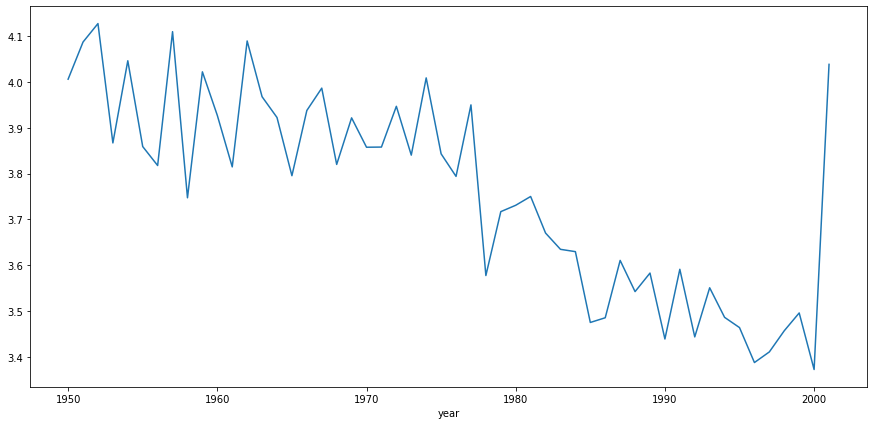

In [23]:
fig, ax = plt.subplots(figsize=(15,7))
years_rate.groupby(['year']).mean()['rating'].plot(ax=ax)
plt.show()

Как оказалось, в моем датасете нет фильмов старше 1999 года, но не понятно, почему 1900 год на графике встал не на то место

In [82]:
years = list(range(1950, 2000))

In [83]:
movies['year'] = movies.apply(production_year, axis=1)

In [84]:
joined = ratings.merge(movies, on='movieId', how='left')
years_rate = joined[['rating', 'year']]

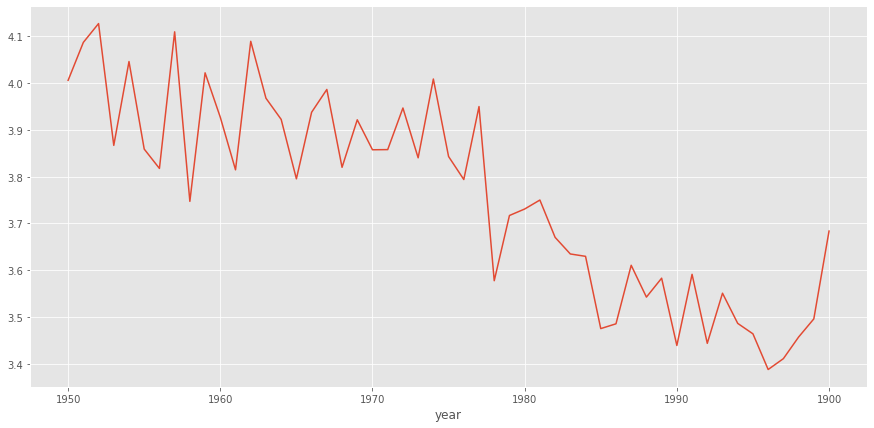

In [85]:
fig, ax = plt.subplots(figsize=(15,7))
years_rate.groupby(['year']).mean()['rating'].plot(ax=ax)
plt.show()